In [152]:

# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

## 가설 : 지역별 유명 관광지와 상품 구매와 관련이 있다.

## 데이터 불러오기

In [153]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection_consume = db['data_consume']
collection_consume_transition = db['data_consume_transition']
collection_attraction = db['data_attraction']
data_consume = collection_consume.find()
data_consume_transition = collection_consume_transition.find()
data_attraction = collection_attraction.find()
df_consume = pd.DataFrame(data_consume)
df_consume_transition = pd.DataFrame(data_consume_transition)
# df_visitor = df_concept.query("destination_type =='전체'")
# df_concept=df_concept.query("destination_type !='전체'")
df_attraction = pd.DataFrame(data_attraction)

In [154]:
df_attraction

,_id,rank,attraction_name,address,classification,attraction_search,region,std_year
0,65e91282bb908e26c8038353,1,속초관광수산시장,강원 속초시 중앙로147번길 16-0,시장,644655,강원,2020
1,65e91282bb908e26c8038354,2,속초해변,강원 속초시 해오름로 186-0,자연경관(하천/해양),276727,강원,2020
2,65e91282bb908e26c8038355,3,경포해변,강원 강릉시,자연경관(하천/해양),263395,강원,2020
3,65e91282bb908e26c8038356,4,주문진항,강원 강릉시 해안로 1758-14,자연경관(하천/해양),215243,강원,2020
4,65e91282bb908e26c8038357,5,쏠비치삼척,강원 삼척시 수로부인길 453-0,콘도미니엄,204957,강원,2020
...,...,...,...,...,...,...,...,...
13595,65e91283bb908e26c803b86e,96,듀레베이커리호암점,충북 충주시 중원대로 3250-0,간이음식,5596,충북,2023
13596,65e91283bb908e26c803b86f,97,오시며가시며,충북 충주시 중방곡길 56-0,한식,5591,충북,2023
13597,65e91283bb908e26c803b870,98,삼학도수산,충북 청주시 흥덕구 비하로 30-0,전문음식,5538,충북,2023
13598,65e91283bb908e26c803b871,99,청주본가청원직영점,충북 청주시 서원구 청남로 889-0,한식,5506,충북,2023


In [155]:
df_consume_transition

,_id,industry_major_cate,std_year_month,std_year,std_month,consumption_amount,region
0,65e932a1bb908e26c804492e,전체,202012,2020,12,59888524.0,강원
1,65e932a1bb908e26c804492f,전체,202001,2020,1,98147222.0,강원
2,65e932a1bb908e26c8044930,전체,202002,2020,2,69547139.0,강원
3,65e932a1bb908e26c8044931,전체,202003,2020,3,62071229.0,강원
4,65e932a1bb908e26c8044932,전체,202004,2020,4,75022238.0,강원
...,...,...,...,...,...,...,...
5688,65e932a2bb908e26c8045f66,여가서비스업,202305,2023,5,19760050.0,충북
5689,65e932a2bb908e26c8045f67,쇼핑업,202305,2023,5,21217701.0,충북
5690,65e932a2bb908e26c8045f68,여행업,202305,2023,5,10149.0,충북
5691,65e932a2bb908e26c8045f69,숙박업,202305,2023,5,3267158.0,충북


In [156]:
df_consume

,_id,std_year,region,consumption_amount,industry_major_cate,industry_middle_cate
0,65e912c3bb908e26c803dea3,2020,강원,2.870202e+06,쇼핑업,관광기념품
1,65e912c3bb908e26c803dea4,2020,강원,8.180715e+07,쇼핑업,레저용품쇼핑
2,65e912c3bb908e26c803dea5,2020,강원,8.001180e+07,쇼핑업,대형쇼핑몰
3,65e912c3bb908e26c803dea6,2020,강원,6.250369e+04,쇼핑업,면세점
4,65e912c3bb908e26c803dea7,2020,강원,2.938260e+07,숙박업,호텔
...,...,...,...,...,...,...
1172,65e912c3bb908e26c803e337,2023,충북,2.397506e+05,여행업,여행업
1173,65e912c3bb908e26c803e338,2023,충북,5.190320e+04,운송업,항공운송
1174,65e912c3bb908e26c803e339,2023,충북,2.589700e+05,운송업,렌터카
1175,65e912c3bb908e26c803e33a,2023,충북,1.114637e+06,운송업,수상운송


In [157]:
df_consume_transition['industry_major_cate'].unique()

array(['전체', '운송업', '여행업', '숙박업', '식음료업', '여가서비스업', '쇼핑업'], dtype=object)

In [158]:
df_consume['industry_major_cate'].unique()

array(['쇼핑업', '숙박업', '식음료업', '여가서비스업', '여행업', '운송업'], dtype=object)

In [159]:
df_consume['industry_middle_cate'].unique()

array(['관광기념품', '레저용품쇼핑', '대형쇼핑몰', '면세점', '호텔', '콘도', '캠핑장/펜션', '기타숙박',
       '식음료', '관광유원시설', '골프장', '기타레저', '문화서비스', '스키장', '여행업', '수상운송',
       '렌터카', '육상운송', '항공운송', '카지노'], dtype=object)

In [160]:
df_attraction['classification'].unique()

array(['시장', '자연경관(하천/해양)', '콘도미니엄', '종교성지', '기타관광', '호텔', '수상레저스포츠',
       '교통시설', '복합관광시설', '기타문화관광지', '육상레저스포츠', '랜드마크관광', '테마공원', '역사유적지',
       '자연공원', '기타레저스포츠', '전시시설', '농/산/어촌체험', '자연경관(산)', '쇼핑몰', '백화점',
       '도시공원', '공연시설', '대형마트', '웰니스관광', '캠핑', '레저스포츠시설', '모텔', '기타쇼핑시설',
       '기타숙박', '데이트코스', '펜션/민박', '역사유물', '자연생태', '자연관광(산)', '면세점', '한식',
       '음식점기타', '카페/찻집', '전문음식', '간이음식', '외국식'], dtype=object)

## 데이터 전처리

### attraction 분류 : '문화관광', '자연관광', '숙박', '레저스포츠', '쇼핑', '음식'

In [161]:
df_attraction['classification'].unique()

array(['시장', '자연경관(하천/해양)', '콘도미니엄', '종교성지', '기타관광', '호텔', '수상레저스포츠',
       '교통시설', '복합관광시설', '기타문화관광지', '육상레저스포츠', '랜드마크관광', '테마공원', '역사유적지',
       '자연공원', '기타레저스포츠', '전시시설', '농/산/어촌체험', '자연경관(산)', '쇼핑몰', '백화점',
       '도시공원', '공연시설', '대형마트', '웰니스관광', '캠핑', '레저스포츠시설', '모텔', '기타쇼핑시설',
       '기타숙박', '데이트코스', '펜션/민박', '역사유물', '자연생태', '자연관광(산)', '면세점', '한식',
       '음식점기타', '카페/찻집', '전문음식', '간이음식', '외국식'], dtype=object)

In [162]:
df_attraction= df_attraction.drop(df_attraction.query("classification =='교통시설'").index)

In [163]:
df_attraction.loc[df_attraction.query("classification in ['카페/찻집', '간이음식', '한식', '전문음식', '외국식','음식점기타']").index,'destination_type'] = '음식'
# ['카페/찻집', '간이음식', '한식', '전문음식', '외국식', '음식점기타']

In [164]:
df_attraction.loc[df_attraction.query("classification == ['도시공원', '자연경관(하천/해양)','자연경관(산)','자연관광(산)', '자연생태','데이트코스', '자연공원','랜드마크관광']").index,'destination_type']='자연관광'

In [165]:
df_attraction.loc[df_attraction.query("classification == ['쇼핑몰', '백화점', '대형마트','면세점']").index,'destination_type']='쇼핑'

In [166]:
df_attraction.loc[df_attraction.query("classification == ['시장', '전시시설', '공연시설', '기타문화관광지', '테마공원','웰니스관광','농/산/어촌체험','역사유적지','종교성지']").index,'destination_type']='문화관광'

In [167]:
df_attraction.loc[df_attraction.query("classification == ['육상레저스포츠','레저스포츠시설','캠핑','수상레저스포츠', '기타레저스포츠']").index,'destination_type']='레저스포츠'

In [168]:
df_attraction.loc[df_attraction.query("classification == ['콘도미니엄', '호텔', '기타숙박']").index,'destination_type']='숙박'

In [169]:
df_attraction['destination_type'].unique()

array(['문화관광', '자연관광', '숙박', nan, '레저스포츠', '쇼핑', '음식'], dtype=object)

In [170]:
set(df_attraction.loc[df_attraction['destination_type'].isna(),'attraction_name'].to_list())

{'J호텔',
 '간월재',
 '간절곶',
 '간절곶소망우체통',
 '감천문화마을',
 '갓바위',
 '강원랜드',
 '갤러리모텔',
 '거창Y자형출렁다리',
 '경북천년숲정원',
 '경주버드파크',
 '경주양남주상절리',
 '경주화랑의언덕',
 '고석정국민관광지',
 '공구의거리',
 '공업탑',
 '광주김치타운',
 '광한루원',
 '구시청사거리',
 '국립생태원',
 '국립세종수목원연구동',
 '그랜드모텔',
 '금강보행교',
 '금강하구둑',
 '금호모텔',
 '기장해녀촌',
 '남원큰엉',
 '남해상상양떼목장편백숲',
 '내장산케이블카',
 '뉴세종모텔',
 '당산파크',
 '대관령양떼목장',
 '대둔산케이블카',
 '대왕암공원출렁다리',
 '대전신세계Art&Science',
 '도담삼봉',
 '도도리파크',
 '독일마을',
 '동의보감촌',
 '동촌유원지',
 '동피랑벽화마을',
 '두물머리',
 '등기산스카이워크',
 '등억온천지구',
 '레지던스호텔라인',
 '로얄모텔',
 '마장호수출렁다리',
 '머루와인동굴',
 '메타세쿼이아가로수길',
 '메타프로방스',
 '목포해상케이블카북항승강장',
 '무한의다리',
 '뮤즈모텔',
 '발렌타인모텔',
 '발왕산케이블카',
 '방축천음악분수',
 '백제문화단지',
 '베스트인시티호텔',
 '벽골제',
 '보롬왓',
 '보문관광단지',
 '보성녹차밭',
 '부소담악',
 '브라운도트호텔첨단점',
 '사인암',
 '사천바다케이블카대방정류장',
 '산굼부리',
 '산막이옛길',
 '삼성궁',
 '삼양대관령목장',
 '삼양라운드힐',
 '삽교호관광지',
 '샤인모텔',
 '선녀바위',
 '선바위',
 '설리스카이워크',
 '설악케이블카',
 '섬진강기차마을',
 '섭지코지',
 '세븐모텔',
 '세븐브릭스호텔',
 '세종어린이천문대',
 '세종필무인텔',
 '세천유원지',
 '속초아이대관람차',
 '송도해상케이블카',
 '송산유원지',
 '쇠소깍',
 '수성유원지',
 '수양개빛터널',
 '순창용궐산하늘길',


In [171]:
df_attraction.loc[df_attraction.loc[df_attraction['attraction_name'].isin(['정동진','송산유원지','운문댐하류보유원지','송산유원지','지산유원지','동촌유원지','수성유원지','세천유원지','산굼부리','벽골제','간월재','간절곶','간절곶소망우체통','갓바위','거창Y자형출렁다리','경북천년숲정원','경주양남주상절리','경주화랑의언덕','남원큰엉','내장산케이블카','대둔산케이블카','대왕암공원출렁다리','도도리파크','두물머리','등기산 스카이워크','마장호수 출렁다리','머루와인 동굴','보성 녹차밭','보롬왓','부소담악','발왕산 케이블카','목포해상케이블카 북항승강장','사인암','사천바다케이블카대방정류장','산막이옛길','삼성궁','삼양라운드힐','선녀바위','선바위','설악케이블카','섭지코지','송도해상케이블카','쇠소깍','순창용궐산하늘길','순천만습지','신비의도로','안반데기','앞산케이블카','여수해상케이블카놀아정류장','여수해상케이블카돌산정류장','영남알프스얼음골케이블카','예당호출렁다리','옐로우출렁다리','옥정호출렁다리','용두암','용머리해안','원주소금산출렁다리','월영교','월영산출렁다리','마장호수출렁다리','이응다리','머루와인동굴','메타세쿼이아가로수길','보성녹차밭','발왕산케이블카','목포해상케이블카북항승강장','임진각','자드락숲','정동원길','정서진','제천옥순봉출렁다리','주상절리대','채계산출렁다리','채석강','천장호출렁다리','철원한탄강은하수교','청남대','청자다리','청풍호반케이블카','촛대바위','춘천삼악산호수케이블카','탑정호출렁다리','태안신두리해안사구','통영케이블카','팔공산케이블카','퍼플교','현충사곡교천은행나무길','황령산봉수대'])].index,"destination_type"] = '자연관광'

In [172]:
df_attraction.loc[df_attraction.loc[df_attraction['attraction_name'].isin(['고석정국민관광지','보문관광단지','등억온천지구','메타프로방스','중문관광단지','삽교호관광지','청풍문화재단지','하슬라아트월드','강원랜드','백제문화단지','경주버드파크','파라다이스시티원더박스','감천문화마을','공구의거리','공업탑','광주김치타운','광한루원','구시청사거리','국립생태원','국립세종수목원연구동','금강보행교','금강하구둑','기장해녀촌','남해상상양떼목장편백숲','대관령양떼목장','독일마을','동의보감촌','동피랑벽화마을','방축천 음악분수','메타세쿼이아 가로수길','삼양대관령목장','설리스카이워크','섬진강기차마을','세종어린이천문대','수양개빛터널','순천만국가정원','순천오픈세트장','스누피가든','엑스포한빛탑','영산강6경(승촌보)승촌보문화관','옥토끼우주센터','와인터널','장생포고래문화마을','지중해마을','태권도원','펭귄마을','방축천음악분수','저도연육교스카이워크','해상스카이워크','등기산스카이워크','해운대블루라인파크미포정거장','무한의다리','헤이리예술마을','헬로키티아일랜드','흰여울문화마을'])].index,"destination_type"] = '문화관광'

In [173]:
df_attraction.loc[df_attraction.loc[df_attraction['attraction_name'].isin(['휘닉스평창','레지던스호텔라인','브라운도트호텔첨단점','아난티코브','제주신화월드','천안상록리조트','J호텔','갤러리모텔','그랜드모텔','금호모텔','뉴세종모텔','당산파크','도담삼봉','레지던스 호텔라인','로얄모텔','뮤즈모텔','발렌타인모텔','브라운도트호텔 첨단점','베스트인시티호텔','샤인모텔','세븐모텔','세븐브릭스호텔','세종필무인텔','스카이무인호텔','시크릿','신라모텔','자자무인텔','청벽비발디펜션','커플링모텔','프로방스','필사랑무인텔','하루모텔','호텔더테라스','호텔세븐','휴휴당한옥펜션',
'힐링빌리지펜션'])].index,"destination_type"] = '숙박'

In [174]:
df_attraction.loc[df_attraction.loc[df_attraction['attraction_name'].isin(['대전신세계Art&Science',])].index,"destination_type"] = '쇼핑'

In [175]:
df_attraction.dropna(subset=['destination_type'], inplace=True)

In [176]:
df_attraction.isnull().sum()

_id                  0
rank                 0
attraction_name      0
address              0
classification       0
attraction_search    0
region               0
std_year             0
destination_type     0
dtype: int64

In [177]:
list_data = []
for x in list(df_attraction['region'].unique()):
    for y in list(df_attraction['destination_type'].unique()):
        data_dict = {}
        data_dict['region']=x
        data_dict['destination_type']=y
        data_dict['attraction_search']=df_attraction.loc[(df_attraction['region']==x) & (df_attraction['destination_type']==y),'attraction_search'].sum()
        list_data.append(data_dict)
data_attraction_sum = pd.DataFrame(data=list_data)
data_attraction_sum

,region,destination_type,attraction_search
0,강원,문화관광,9738098
1,강원,자연관광,10257543
2,강원,숙박,9301901
3,강원,레저스포츠,2744666
4,강원,쇼핑,0
...,...,...,...
97,충북,자연관광,2985789
98,충북,숙박,1377916
99,충북,레저스포츠,4896847
100,충북,쇼핑,927965


In [178]:
data_attraction_sum['destination_type'].unique()

array(['문화관광', '자연관광', '숙박', '레저스포츠', '쇼핑', '음식'], dtype=object)

### consume 분류 : '기타', '레저스포츠', '쇼핑', '숙박', '음식', '자연관광', '문화관광'

In [179]:
df_consume.loc[df_consume.query("industry_middle_cate in ['레저용품쇼핑','캠핑장/펜션','골프장','기타레저','스키장']").index,'industry_type'] = '레저스포츠'

In [180]:
df_consume.loc[df_consume.query("industry_middle_cate in ['대형쇼핑몰','면세점']").index,'industry_type'] = '쇼핑'

In [181]:
df_consume.loc[df_consume.query("industry_middle_cate in ['문화서비스','카지노']").index,'industry_type'] = '문화관광'

In [182]:
df_consume.loc[df_consume.query("industry_middle_cate in ['호텔','콘도','기타숙박']").index,'industry_type'] = '숙박'

In [183]:
df_consume.loc[df_consume.query("industry_middle_cate in ['식음료']").index,'industry_type'] = '음식'

In [184]:
df_consume.loc[df_consume.query("industry_middle_cate in ['관광유원시설']").index,'industry_type'] = '자연관광'

In [185]:
df_consume.loc[df_consume.query("industry_middle_cate in ['수상운송','렌터카','육상운송','항공운송','관광기념품','여행업']").index,'industry_type'] = '기타'

In [186]:
df_consume = df_consume.query("industry_type != '기타'")

In [187]:
df_consume['industry_type'].unique()

array(['레저스포츠', '쇼핑', '숙박', '음식', '자연관광', '문화관광'], dtype=object)

## DDA & EDA

### 관광지 유형별 전국 관광지 방문객 수 분포 비율

In [188]:
pivot_attraction=pd.pivot_table(data=df_attraction,index="region",columns = "destination_type",values='attraction_search',aggfunc='sum')
pivot_attraction

destination_type,레저스포츠,문화관광,쇼핑,숙박,음식,자연관광
region,,,,,,
강원,2744666.0,9738098.0,NaN,9301901.0,10524341.0,10257543.0
경기,2890460.0,14317403.0,48918389.0,866923.0,15162870.0,10475938.0
경남,2146843.0,6600853.0,2392445.0,1348966.0,4108589.0,2668337.0
경북,1879754.0,7426833.0,173009.0,1870344.0,5065397.0,3621794.0
광주,349171.0,2136170.0,1732516.0,508094.0,2276342.0,441888.0
대구,489501.0,3899587.0,3930381.0,1034349.0,3285110.0,1990408.0
대전,640613.0,1917585.0,4037354.0,994710.0,3740999.0,1241020.0
부산,1120255.0,6225144.0,9010754.0,2966147.0,5844877.0,5981596.0
서울,818317.0,13789047.0,29481866.0,7219625.0,8221779.0,6606251.0


In [189]:
pivot_attraction.fillna(0, inplace=True)
pivot_attraction

destination_type,레저스포츠,문화관광,쇼핑,숙박,음식,자연관광
region,,,,,,
강원,2744666.0,9738098.0,0.0,9301901.0,10524341.0,10257543.0
경기,2890460.0,14317403.0,48918389.0,866923.0,15162870.0,10475938.0
경남,2146843.0,6600853.0,2392445.0,1348966.0,4108589.0,2668337.0
경북,1879754.0,7426833.0,173009.0,1870344.0,5065397.0,3621794.0
광주,349171.0,2136170.0,1732516.0,508094.0,2276342.0,441888.0
대구,489501.0,3899587.0,3930381.0,1034349.0,3285110.0,1990408.0
대전,640613.0,1917585.0,4037354.0,994710.0,3740999.0,1241020.0
부산,1120255.0,6225144.0,9010754.0,2966147.0,5844877.0,5981596.0
서울,818317.0,13789047.0,29481866.0,7219625.0,8221779.0,6606251.0


In [190]:
pivot_attraction_ratio = pivot_attraction.copy()
for j in list(pivot_attraction.columns):
    for i in pivot_attraction.index:
        pivot_attraction_ratio.loc[i, j] = float(pivot_attraction.loc[i, j] / pivot_attraction.loc[:, j].sum())
pivot_attraction_ratio

destination_type,레저스포츠,문화관광,쇼핑,숙박,음식,자연관광
region,,,,,,
강원,0.104507,0.101608,0.000000,0.236118,0.110538,0.125171
경기,0.110058,0.149389,0.442159,0.022006,0.159256,0.127836
경남,0.081744,0.068874,0.021625,0.034242,0.043153,0.032561
경북,0.071574,0.077492,0.001564,0.047477,0.053202,0.044196
광주,0.013295,0.022289,0.015660,0.012897,0.023909,0.005392
대구,0.018638,0.040689,0.035526,0.026256,0.034504,0.024289
대전,0.024392,0.020008,0.036492,0.025250,0.039292,0.015144
부산,0.042655,0.064954,0.081445,0.075292,0.061389,0.072992
서울,0.031159,0.143876,0.266478,0.183262,0.086354,0.080615


In [191]:
list_concept_region = {'레저스포츠':[],'문화관광':[],'쇼핑':[],'숙박':[],'음식':[],'자연관광':[]}
for i in list(pivot_attraction_ratio.index):
    print("* {} : {}, {}, {}, {}, {}".format(i,pivot_attraction_ratio.loc[i].sort_values(ascending=False).keys()[0],pivot_attraction_ratio.loc[i].sort_values(ascending=False).keys()[1],pivot_attraction_ratio.loc[i].sort_values(ascending=False).keys()[2],pivot_attraction_ratio.loc[i].sort_values(ascending=False).keys()[3],pivot_attraction_ratio.loc[i].sort_values(ascending=False).keys()[4]))
    list_concept_region[pivot_attraction_ratio.loc[i].sort_values(ascending=False).keys()[0]].append(i)
    list_concept_region[pivot_attraction_ratio.loc[i].sort_values(ascending=False).keys()[1]].append(i)
    list_concept_region[pivot_attraction_ratio.loc[i].sort_values(ascending=False).keys()[2]].append(i)

* 강원 : 숙박, 자연관광, 음식, 레저스포츠, 문화관광
* 경기 : 쇼핑, 음식, 문화관광, 자연관광, 레저스포츠
* 경남 : 레저스포츠, 문화관광, 음식, 숙박, 자연관광
* 경북 : 문화관광, 레저스포츠, 음식, 숙박, 자연관광
* 광주 : 음식, 문화관광, 쇼핑, 레저스포츠, 숙박
* 대구 : 문화관광, 쇼핑, 음식, 숙박, 자연관광
* 대전 : 음식, 쇼핑, 숙박, 레저스포츠, 문화관광
* 부산 : 쇼핑, 숙박, 자연관광, 문화관광, 음식
* 서울 : 쇼핑, 숙박, 문화관광, 음식, 자연관광
* 세종 : 음식, 레저스포츠, 문화관광, 자연관광, 숙박
* 울산 : 자연관광, 레저스포츠, 음식, 문화관광, 숙박
* 인천 : 자연관광, 레저스포츠, 음식, 문화관광, 숙박
* 전남 : 음식, 자연관광, 숙박, 레저스포츠, 문화관광
* 전북 : 레저스포츠, 음식, 문화관광, 자연관광, 숙박
* 제주 : 자연관광, 숙박, 음식, 문화관광, 레저스포츠
* 충남 : 자연관광, 문화관광, 레저스포츠, 음식, 숙박
* 충북 : 레저스포츠, 음식, 자연관광, 숙박, 문화관광


### 관광지 유형별 전국 소비액 분포 비율

In [209]:
pivot_consume=pd.pivot_table(data=df_consume,index="region",columns = "industry_type",values='consumption_amount',aggfunc='sum')
pivot_consume = pivot_consume/10000
pivot_consume_ratio = pivot_consume.copy()
for j in list(pivot_consume.columns):
    for i in pivot_consume.index:
        pivot_consume_ratio.loc[i, j] = float(pivot_consume.loc[i, j] / pivot_consume.loc[:, j].sum())
pivot_consume_ratio.loc[:,'레저스포츠']

region
강원    0.060112
경기    0.278268
경남    0.067979
경북    0.066037
광주    0.023762
대구    0.034820
대전    0.011456
부산    0.042133
서울    0.150798
세종    0.003851
울산    0.015917
인천    0.043618
전남    0.044052
전북    0.036226
제주    0.028229
충남    0.039204
충북    0.053537
Name: 레저스포츠, dtype: float64

In [193]:
list_consume_region = {'레저스포츠':[],'문화관광':[],'쇼핑':[],'숙박':[],'음식':[],'자연관광':[]}
for i in list(pivot_consume_ratio.index):
    print("* {} : {}, {}, {}, {}, {}".format(i,pivot_consume_ratio.loc[i].sort_values(ascending=False).keys()[0],pivot_consume_ratio.loc[i].sort_values(ascending=False).keys()[1],pivot_consume_ratio.loc[i].sort_values(ascending=False).keys()[2],pivot_consume_ratio.loc[i].sort_values(ascending=False).keys()[3],pivot_consume_ratio.loc[i].sort_values(ascending=False).keys()[4]))
    list_consume_region[pivot_consume_ratio.loc[i].sort_values(ascending=False).keys()[0]].append(i)
    list_consume_region[pivot_consume_ratio.loc[i].sort_values(ascending=False).keys()[1]].append(i)
    list_consume_region[pivot_consume_ratio.loc[i].sort_values(ascending=False).keys()[2]].append(i)

* 강원 : 숙박, 자연관광, 레저스포츠, 문화관광, 음식
* 경기 : 쇼핑, 레저스포츠, 문화관광, 음식, 자연관광
* 경남 : 레저스포츠, 음식, 숙박, 자연관광, 문화관광
* 경북 : 레저스포츠, 숙박, 음식, 자연관광, 문화관광
* 광주 : 쇼핑, 음식, 레저스포츠, 자연관광, 문화관광
* 대구 : 쇼핑, 음식, 레저스포츠, 자연관광, 숙박
* 대전 : 쇼핑, 음식, 숙박, 문화관광, 자연관광
* 부산 : 쇼핑, 숙박, 음식, 자연관광, 레저스포츠
* 서울 : 문화관광, 음식, 쇼핑, 자연관광, 숙박
* 세종 : 레저스포츠, 음식, 문화관광, 숙박, 쇼핑
* 울산 : 음식, 레저스포츠, 숙박, 쇼핑, 문화관광
* 인천 : 쇼핑, 음식, 레저스포츠, 숙박, 문화관광
* 전남 : 자연관광, 숙박, 레저스포츠, 음식, 문화관광
* 전북 : 레저스포츠, 숙박, 음식, 문화관광, 자연관광
* 제주 : 숙박, 자연관광, 문화관광, 레저스포츠, 음식
* 충남 : 레저스포츠, 숙박, 음식, 쇼핑, 문화관광
* 충북 : 레저스포츠, 음식, 숙박, 자연관광, 문화관광


<Axes: xlabel='region', ylabel='쇼핑'>

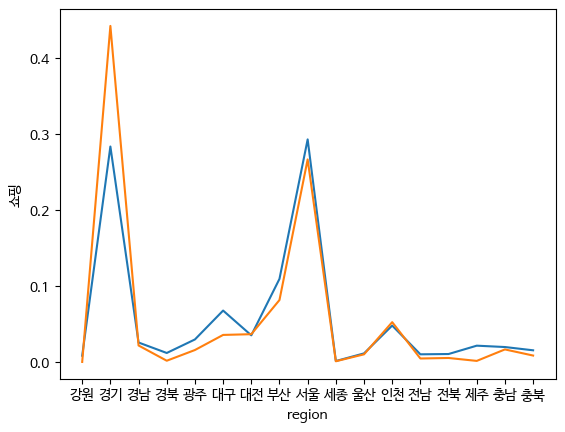

In [219]:
sns.lineplot(pivot_consume_ratio.loc[:,'쇼핑'])
sns.lineplot(pivot_attraction_ratio.loc[:,'쇼핑'])

<Axes: xlabel='region', ylabel='음식'>

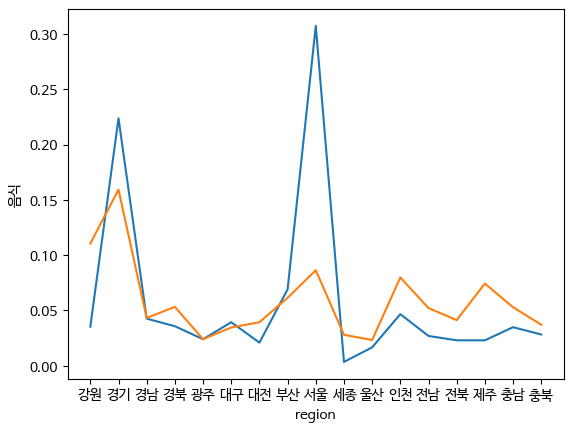

In [220]:
sns.lineplot(pivot_consume_ratio.loc[:,'음식'])
sns.lineplot(pivot_attraction_ratio.loc[:,'음식'])

<Axes: xlabel='region', ylabel='자연관광'>

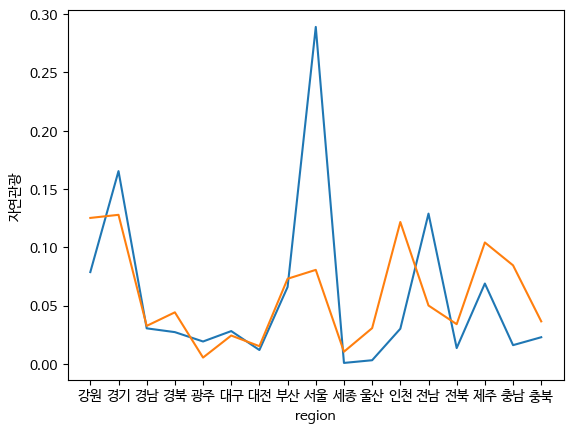

In [221]:
sns.lineplot(pivot_consume_ratio.loc[:,'자연관광'])
sns.lineplot(pivot_attraction_ratio.loc[:,'자연관광'])

<Axes: xlabel='region', ylabel='문화관광'>

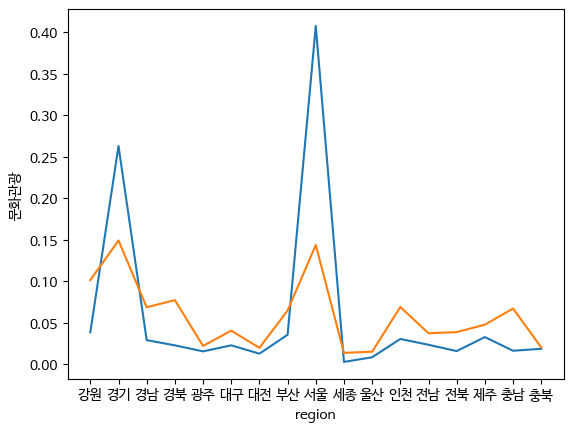

In [222]:
sns.lineplot(pivot_consume_ratio.loc[:,'문화관광'])
sns.lineplot(pivot_attraction_ratio.loc[:,'문화관광'])

<Axes: xlabel='region', ylabel='레저스포츠'>

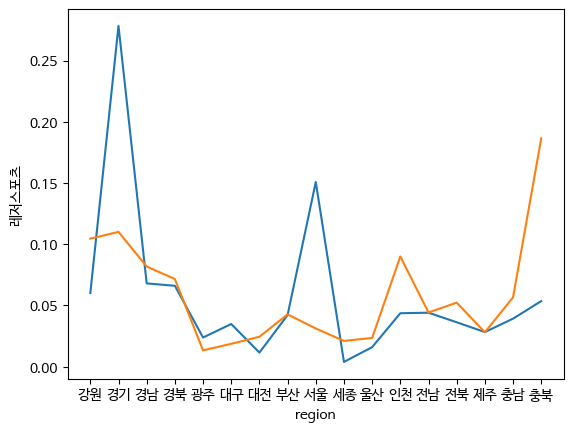

In [223]:
sns.lineplot(pivot_consume_ratio.loc[:,'레저스포츠'])
sns.lineplot(pivot_attraction_ratio.loc[:,'레저스포츠'])

<Axes: xlabel='region', ylabel='숙박'>

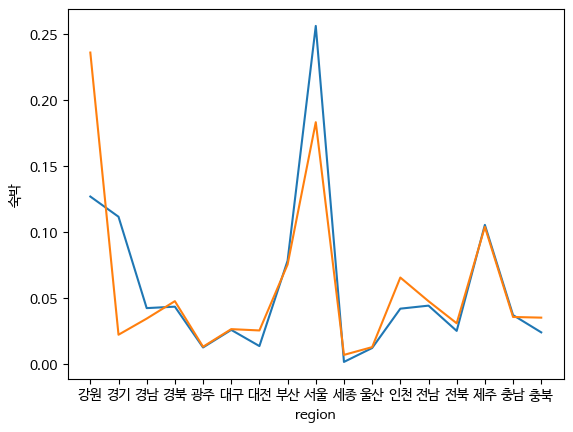

In [224]:
sns.lineplot(pivot_consume_ratio.loc[:,'숙박'])
sns.lineplot(pivot_attraction_ratio.loc[:,'숙박'])

### 소비의 지역별 분포도와 관광지의 지역별 분포도를 비교해봤을 때 쇼핑을 제외한 나머지 키워드는 상관관계를 찾기 어려움